# Time Series Basics

In [2]:
# Initial imports
import pandas as pd
import os
import datetime
import requests
import alpaca_trade_api as tradeapi
from pathlib import Path
from datetime import datetime,date
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import ccxt
import math
import pandas_datareader as web
plt.style.use('fivethirtyeight')

%matplotlib inline
from dotenv import load_dotenv

## Import Cryptos Data Using KRAKEN API KEY

In [3]:
# Load environment variables
load_dotenv()

# Import environment variables
Kraken_Public_Key = os.getenv("KRAKEN_API_KEY")
Kraken_Secret_Key = os.getenv("KRAKEN_SECRET_KEY")

# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': Kraken_Public_Key,
    'secret': Kraken_Secret_Key,
})

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(Kraken_Public_Key)}")
print(f"Kraken secren data type: {type(Kraken_Secret_Key)}")

# Connect to Kraken and load the available cryptocurrencies
Crypto_Details = exchange.load_markets()

# Import data as a Pandas DataFrame
Crypto_df = pd.DataFrame(Crypto_Details)

# Display sample data
Crypto_df

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


AAVE/USD  \
percentage                                               True   
tierBased                                                True   
taker                                                  0.0026   
maker                                                  0.0016   
tiers       {'taker': [[0, 0.0026], [50000, 0.0024], [1000...   
precision                           {'amount': 8, 'price': 2}   
limits      {'amount': {'min': 0.1, 'max': 100000000.0}, '...   
id                                                    AAVEUSD   
symbol                                               AAVE/USD   
base                                                     AAVE   
quote                                                     USD   
baseId                                                   AAVE   
quoteId                                                  ZUSD   
darkpool                                                False   
info        {'altname': 'AAVEUSD', 'wsname': 'AAVE/USD', '...   
altname                                               AAVEUSD   
active                                                   True   

                                                     AAVE/BTC  \
percentage                                               True   
tierBased                                                True   
taker                                                  0.0026   
maker                                                  0.0016   
tiers       {'taker': [[0, 0.0026], [50000, 0.0024], [1000...   
precision                           {'amount': 8, 'price': 6}   
limits      {'amount': {'min': 0.1, 'max': 100000000.0}, '...   
id                                                    AAVEXBT   
symbol                                               AAVE/BTC   
base                                                     AAVE   
quote                                                     BTC   
baseId                                                   AAVE   
quoteId                                                  XXBT   
darkpool                                                False   
info        {'altname': 'AAVEXBT', 'wsname': 'AAVE/XBT', '...   
altname                                               AAVEXBT   
active                                                   True   

                                                      ADA/ETH  \
percentage                                               True   
tierBased                                                True   
taker                                                  0.0026   
maker                                                  0.0016   
tiers       {'taker': [[0, 0.0026], [50000, 0.0024], [1000...   
precision                           {'amount': 8, 'price': 7}   
limits      {'amount': {'min': 50.0, 'max': 100000000.0}, ...   
id                                                     ADAETH   
symbol                                                ADA/ETH   
base                                                      ADA   
quote                                                     ETH   
baseId                                                    ADA   
quoteId                                                  XETH   
darkpool                                                False   
info        {'altname': 'ADAETH', 'wsname': 'ADA/ETH', 'ac...   
altname                                                ADAETH   
active                                                   True   

                                                      ADA/EUR  \
percentage                                               True   
tierBased                                                True   
taker                                                  0.0026   
maker                                                  0.0016   
tiers       {'taker': [[0, 0.0026], [50000, 0.0024], [1000...   
precision                           {'amount': 8, 'price': 6}   
limits      {'amount': {'min': 50.0, 'max': 100000000.0}, ...   
id                  

In [4]:
# Print column values of DataFrame
print(type(Crypto_df.columns.values))
print(Crypto_df.columns.values)
print(len(Crypto_df.columns.values))
# Show list of available functions for the current exchange (in this case Kraken)
exchange.has

<class 'numpy.ndarray'>
['AAVE/ETH' 'AAVE/EUR' 'AAVE/GBP' 'AAVE/USD' 'AAVE/BTC' 'ADA/ETH'
 'ADA/EUR' 'ADA/USD' 'ADA/USDT' 'ADA/BTC' 'ALGO/ETH' 'ALGO/EUR' 'ALGO/USD'
 'ALGO/BTC' 'ANT/ETH' 'ANT/EUR' 'ANT/USD' 'ANT/BTC' 'ATOM/ETH' 'ATOM/EUR'
 'ATOM/USD' 'ATOM/BTC' 'AUD/JPY' 'AUD/USD' 'BAL/ETH' 'BAL/EUR' 'BAL/USD'
 'BAL/BTC' 'BAT/ETH' 'BAT/EUR' 'BAT/USD' 'BAT/BTC' 'BCH/AUD' 'BCH/ETH'
 'BCH/EUR' 'BCH/GBP' 'BCH/JPY' 'BCH/USD' 'BCH/USDT' 'BCH/BTC' 'COMP/ETH'
 'COMP/EUR' 'COMP/USD' 'COMP/BTC' 'CRV/ETH' 'CRV/EUR' 'CRV/USD' 'CRV/BTC'
 'DAI/EUR' 'DAI/USD' 'DAI/USDT' 'DASH/EUR' 'DASH/USD' 'DASH/BTC' 'DOT/ETH'
 'DOT/EUR' 'DOT/USD' 'DOT/USDT' 'DOT/BTC' 'EOS/ETH' 'EOS/EUR' 'EOS/USD'
 'EOS/USDT' 'EOS/BTC' 'ETH2.S/ETH' 'ETH/AUD' 'ETH/CHF' 'ETH/DAI'
 'ETH/USDC' 'ETH/USDT' 'EUR/AUD' 'EUR/CAD' 'EUR/CHF' 'EUR/GBP' 'EUR/JPY'
 'FIL/ETH' 'FIL/EUR' 'FIL/USD' 'FIL/BTC' 'GNO/ETH' 'GNO/EUR' 'GNO/USD'
 'GNO/BTC' 'GRT/ETH' 'GRT/EUR' 'GRT/USD' 'GRT/BTC' 'ICX/ETH' 'ICX/EUR'
 'ICX/USD' 'ICX/BTC' 'KAVA/ETH' 'KAVA/EUR' 

{'loadMarkets': True,
 'cancelAllOrders': False,
 'cancelOrder': True,
 'cancelOrders': False,
 'CORS': False,
 'createDepositAddress': True,
 'createLimitOrder': True,
 'createMarketOrder': True,
 'createOrder': True,
 'deposit': False,
 'editOrder': 'emulated',
 'fetchBalance': True,
 'fetchClosedOrders': True,
 'fetchCurrencies': True,
 'fetchDepositAddress': True,
 'fetchDeposits': True,
 'fetchL2OrderBook': True,
 'fetchLedger': True,
 'fetchMarkets': True,
 'fetchMyTrades': True,
 'fetchOHLCV': True,
 'fetchOpenOrders': True,
 'fetchOrder': True,
 'fetchOrderBook': True,
 'fetchOrderBooks': False,
 'fetchOrders': False,
 'fetchOrderTrades': 'emulated',
 'fetchStatus': 'emulated',
 'fetchTicker': True,
 'fetchTickers': True,
 'fetchTime': True,
 'fetchTrades': True,
 'fetchTradingFee': True,
 'fetchTradingFees': True,
 'fetchFundingFee': False,
 'fetchFundingFees': False,
 'fetchTradingLimits': False,
 'fetchTransactions': False,
 'fetchWithdrawals': True,
 'privateAPI': True,
 'p

## Fetch Historical Data for BTC/USD and ETH/USD

In [68]:
# Fetch daily candlestick bar data from `BTC/USD`
BTC_Historical_Prices = exchange.fetch_ohlcv("BTC/USD", "1d")

# Import the data as a Pandas DataFrame and set the columns
BTC_Historical_Prices_df = pd.DataFrame(
    BTC_Historical_Prices, columns=["timestamp", "open", "high", "low", "close", "volume"]
)

# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
BTC_Historical_Prices_df["date"] = pd.to_datetime(
    BTC_Historical_Prices_df["timestamp"], unit="ms"
)

# Pick all Cryptos close prices
BTC_df = BTC_Historical_Prices_df.drop(columns=["timestamp", "open", "high", "low", "volume"])

# Use the `rename` function and set the `columns` parameter to a dictionary of new column names
BTC_df = BTC_df.rename(columns={
    "close": "BTC_Close",
    "date": "Date"})

# Use a list of re-ordered column names to alter the column order of the original DataFrame
BTC_df = BTC_df[["Date", "BTC_Close"]]
BTC_df_1 = BTC_df.copy()
BTC_df_1.dropna()

Date  BTC_Close
0   2019-01-30     3436.9
1   2019-01-31     3409.6
2   2019-02-01     3437.2
3   2019-02-02     3466.0
4   2019-02-03     3415.2
..         ...        ...
715 2021-01-14    39151.6
716 2021-01-15    36739.8
717 2021-01-16    36014.6
718 2021-01-17    35816.4
719 2021-01-18    34902.9

[720 rows x 2 columns]

In [70]:
BTC_df_1_pct = BTC_df_1.pct_change()
BTC_df_1_pct

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

## Import Stocks Data using Yahoo Source

In [9]:
# Get the stock data using yahoo source
Data = web.DataReader('AAPL', data_source='yahoo', start='2016-01-01', end='2021-01-15')

In [10]:
# Get the stock data using yahoo source
Data_1 = web.DataReader('^GSPC', data_source='yahoo', start='2016-01-01', end='2021-01-15')
# Rename Adj Close to Adj_Close
Data_1 = Data_1.rename(columns={
    "Adj Close": "S&P500_Adj_Close"
})
Data_1

High          Low         Open        Close      Volume  \
Date                                                                         
2016-01-04  2038.199951  1989.680054  2038.199951  2012.660034  4304880000   
2016-01-05  2021.939941  2004.170044  2013.780029  2016.709961  3706620000   
2016-01-06  2011.709961  1979.050049  2011.709961  1990.260010  4336660000   
2016-01-07  1985.319946  1938.829956  1985.319946  1943.089966  5076590000   
2016-01-08  1960.400024  1918.459961  1945.969971  1922.030029  4664940000   
...                 ...          ...          ...          ...         ...   
2021-01-11  3817.860107  3789.020020  3803.139893  3799.610107  4450500000   
2021-01-12  3810.780029  3776.510010  3801.620117  3801.189941  4977210000   
2021-01-13  3820.959961  3791.500000  3802.229980  3809.840088  4590420000   
2021-01-14  3823.600098  3792.860107  3814.979980  3795.540039  5180140000   
2021-01-15  3788.729980  3749.620117  3788.729980  3768.250000  5353060000   

            S&P500_Adj_Close  
Date                          
2016-01-04       2012.660034  
2016-01-05       2016.709961  
2016-01-06       1990.260010  
2016-01-07       1943.089966  
2016-01-08       1922.030029  
...                      ...  
2021-01-11       3799.610107  
2021-01-12       3801.189941  
2021-01-13       3809.840088  
2021-01-14       3795.540039  
2021-01-15       3768.250000  

[1269 rows x 6 columns]

In [11]:
# Rename Adj Close to Adj_Close
Data = Data.rename(columns={
    "Adj Close": "AAPL_Adj_Close"
})
Data.head()

High        Low       Open      Close       Volume  \
Date                                                                  
2016-01-04  26.342501  25.500000  25.652500  26.337500  270597600.0   
2016-01-05  26.462500  25.602501  26.437500  25.677500  223164000.0   
2016-01-06  25.592501  24.967501  25.139999  25.174999  273829600.0   
2016-01-07  25.032499  24.107500  24.670000  24.112499  324377600.0   
2016-01-08  24.777500  24.190001  24.637501  24.240000  283192000.0   

            AAPL_Adj_Close  
Date                        
2016-01-04       24.400942  
2016-01-05       23.789471  
2016-01-06       23.323915  
2016-01-07       22.339539  
2016-01-08       22.457672

In [12]:
# Pick all Stocks volumes
AAPL_volume_df = Data["Volume"]
# Rename Column
AAPL_volume_df.columns = ["Apple"]

# Select all rows for 5 Days
volume_5days = AAPL_volume_df.loc['2021-01-10':'2021-01-15']
# Select all rows for 1 Month
volume_1Month = AAPL_volume_df.loc['2020-12-15':'2021-01-15']
# Select all rows for 3 Month
volume_3Months = AAPL_volume_df.loc['2020-10-15':'2021-01-15']
# Select all rows for 6 Months
volume_6Months = AAPL_volume_df.loc['2020-06-15':'2021-01-15']
# Select all rows for 1 Year
volume_1Year = AAPL_volume_df.loc['2019-01-15':'2021-01-15']

## Plot the Results

In [13]:
# Plot 5 Days
volume_5days.hvplot.bar(
    figsize=(20,15), 
    subplots=True, 
    title=('Volumes Over the past 5 Days'),
    height=330,
    width=2000,
    ylabel='Total Volumes', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 12, 'yticks': 15})

:Bars   [Date]   (Volume)

In [14]:
# Plot 1 Month
volume_1Month.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True, 
    title=('Volumes Over the past 30 Days Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 10, 'yticks': 15})

:Bars   [Date]   (Volume)

In [15]:
# Plot 3 Months
volume_3Months.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True, 
    title=('Volumes Over the past 3 Months Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 10, 'yticks': 15})

:Bars   [Date]   (Volume)

In [16]:
# Plot 6 Months
volume_6Months.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True,
    title=('Volumes Over the past 6 Months Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 9, 'yticks': 15})

:Bars   [Date]   (Volume)

In [17]:
# Plot 1 Year
volume_1Year_plot = volume_1Year.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True, 
    title=('Volumes Over the past 12 Months Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 3, 'yticks': 15})
volume_1Year_plot

:Bars   [Date]   (Volume)

## Use Bokeh Libraries for CandleStick Plots

In [18]:
# Import Brick Plot
import bokeh
bokeh.sampledata.download()
from math import pi
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL

Using data directory: /Users/miladnazar/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


In [19]:
# Plot 5 Days Closing Prices
price_5Days = Data['2021-01-10':'2021-01-15']
price_5Days["Date"] = pd.to_datetime(price_5Days.index)

inc = price_5Days.AAPL_Adj_Close > price_5Days.Open
dec = price_5Days.Open > price_5Days.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Adjusted Closing Prices Over the past 5 Days Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_5Days.Date, price_5Days.High, price_5Days.Date, price_5Days.Low, color="black")
p.vbar(price_5Days.Date[inc], w, price_5Days.Open[inc], price_5Days.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_5Days.Date[dec], w, price_5Days.Open[dec], price_5Days.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [20]:
# Plot 1 Month Closing Prices
price_1Month = Data['2020-12-15':'2021-01-15']
price_1Month["Date"] = pd.to_datetime(price_1Month.index)

inc = price_1Month.AAPL_Adj_Close > price_1Month.Open
dec = price_1Month.Open > price_1Month.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Adjusted Closing Prices Over the past 1 Month Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_1Month.Date, price_1Month.High, price_1Month.Date, price_1Month.Low, color="black")
p.vbar(price_1Month.Date[inc], w, price_1Month.Open[inc], price_1Month.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_1Month.Date[dec], w, price_1Month.Open[dec], price_1Month.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [21]:
# Plot 3 Months Closing Prices
price_3Months = Data['2020-10-15':'2021-01-15']
price_3Months["Date"] = pd.to_datetime(price_3Months.index)

inc = price_3Months.AAPL_Adj_Close > price_3Months.Open
dec = price_3Months.Open > price_3Months.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Adjusted Closing Prices Over the past 3 Months Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_3Months.Date, price_3Months.High, price_3Months.Date, price_3Months.Low, color="black")
p.vbar(price_3Months.Date[inc], w, price_3Months.Open[inc], price_3Months.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_3Months.Date[dec], w, price_3Months.Open[dec], price_3Months.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [22]:
# Plot 6 Months Closing Prices
price_6Months = Data['2020-07-15':'2021-01-15']
price_6Months["Date"] = pd.to_datetime(price_6Months.index)

inc = price_6Months.AAPL_Adj_Close > price_6Months.Open
dec = price_6Months.Open > price_6Months.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Adjusted Closing Prices Over the past 6 Months Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_6Months.Date, price_6Months.High, price_6Months.Date, price_6Months.Low, color="black")
p.vbar(price_6Months.Date[inc], w, price_6Months.Open[inc], price_6Months.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_6Months.Date[dec], w, price_6Months.Open[dec], price_6Months.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [23]:
# Plot 6 Months Closing Prices
price_12Months = Data['2019-01-15':'2021-01-15']
price_12Months["Date"] = pd.to_datetime(price_12Months.index)

inc = price_12Months.AAPL_Adj_Close > price_12Months.Open
dec = price_12Months.Open > price_12Months.AAPL_Adj_Close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Adjusted Closing Prices Over the past 12 Months Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_12Months.Date, price_12Months.High, price_12Months.Date, price_12Months.Low, color="black")
p.vbar(price_12Months.Date[inc], w, price_12Months.Open[inc], price_12Months.AAPL_Adj_Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_12Months.Date[dec], w, price_12Months.Open[dec], price_12Months.AAPL_Adj_Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [24]:
# Pick Apple Inc. adjusted close prices
AAPL_close_df = Data["AAPL_Adj_Close"]
# Calculate Daily Returns for Apple Inc
AAPL_close_df_pct = AAPL_close_df.pct_change()

In [25]:
# Pick S&P500 adjusted close prices
SP500_close_df = Data_1["S&P500_Adj_Close"]
# Calculate Daily Returns for SP500
SP500_close_df_pct = SP500_close_df.pct_change()

In [26]:
# Concatenate all DataFrames into a single DataFrame
Combined_Returns = pd.concat([ AAPL_close_df_pct, SP500_close_df_pct ], axis="columns", join="inner")
Combined_Returns.sort_index(inplace=True)
Combined_Returns.dropna()

AAPL_Adj_Close  S&P500_Adj_Close
Date                                        
2016-01-05       -0.025059          0.002012
2016-01-06       -0.019570         -0.013115
2016-01-07       -0.042205         -0.023700
2016-01-08        0.005288         -0.010838
2016-01-11        0.016192          0.000853
...                    ...               ...
2021-01-11       -0.023249         -0.006555
2021-01-12       -0.001396          0.000416
2021-01-13        0.016227          0.002276
2021-01-14       -0.015127         -0.003753
2021-01-15       -0.013731         -0.007190

[1268 rows x 2 columns]

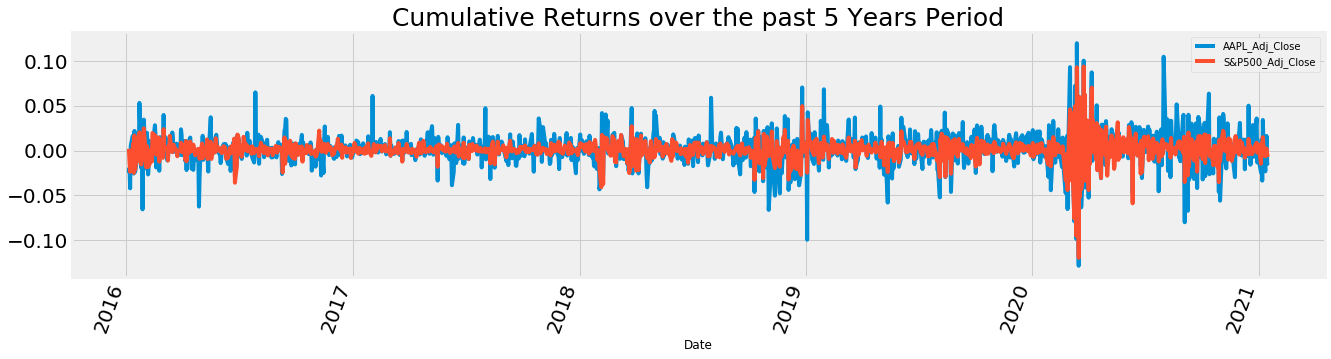

In [27]:
Combined_Returns.plot.line(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Cumulative Returns over the past 5 Years Period", fontsize=25);

### Cumulative Returns

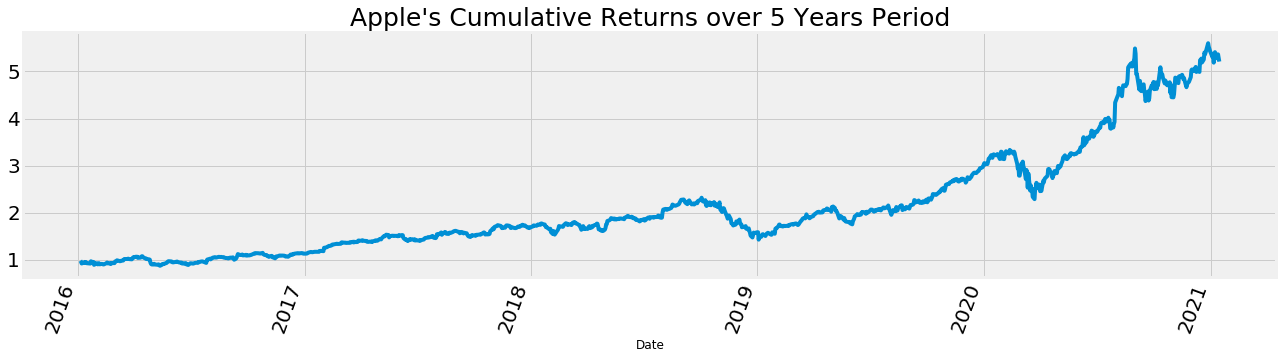

In [28]:
# Plot cumulative returns
Cumulative_Returns = (1 + AAPL_close_df_pct).cumprod()
Cumulative_Returns.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Cumulative Returns over 5 Years Period", fontsize=25);

## Exponentially Weighted Moving Average

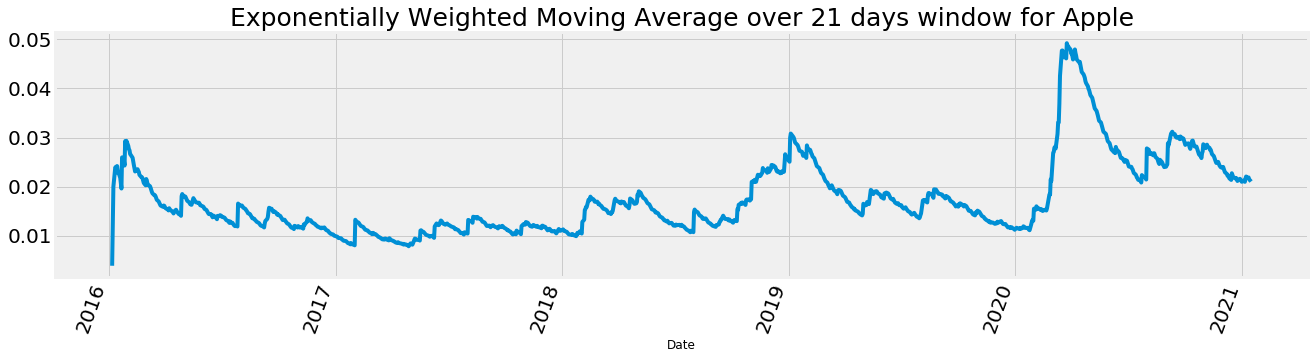

In [29]:
# Calculate a rolling window using the exponentially weighted moving average. 
AAPL_close_df_pct.ewm(halflife = 21).std().plot(
    kind='line', 
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Exponentially Weighted Moving Average over 21 days window for Apple", fontsize=25);

In [30]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
Covariance_Apple = Data["Adj_Close"].rolling(window = 21).cov(Data_1["S&P500_Adj_Close"])
Variance_Apple = Data_1["S&P500_Adj_Close"].rolling(window = 21).var()
Beta_Apple = Covariance_Apple / Variance_Apple
Beta_Apple.plot(
    kind='line', 
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Beta comparison between Apple Inc. and S&P 500", fontsize=25);

KeyError: 'Adj_Close'

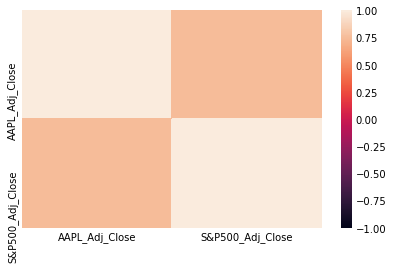

In [31]:
# Construct a correlation table
Correlation = Combined_Returns.corr()
Correlation
sns.heatmap(Correlation, vmin=-1, vmax=1)

## Forecasting Using ARMA & ARIMA Model

In [32]:
# Making sure to drop NANS before Modeling
AAPL_close_df_pct = AAPL_close_df_pct.dropna()
AAPL_close_df_pct.head()

Date
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
2016-01-08    0.005288
2016-01-11    0.016192
Name: AAPL_Adj_Close, dtype: float64

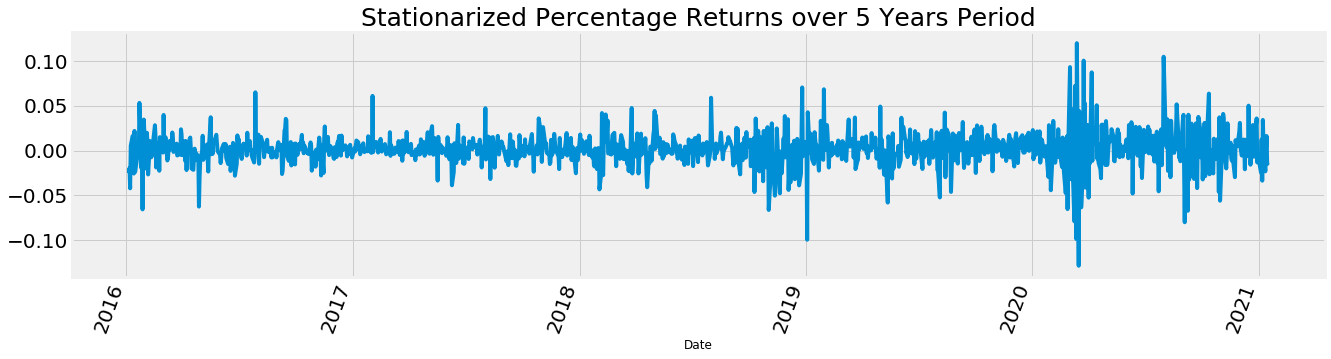

In [33]:
# Data must be Stationarized and here is the plot
from matplotlib import pyplot as plt    
AAPL_close_df_pct.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Stationarized Percentage Returns over 5 Years Period", fontsize=25);

## ARMA Model for Apple Inc

In [34]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(AAPL_close_df_pct.values, order=(1,1))
# Fit the model to the data
results = model.fit()

In [35]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model_ARMA_2 = ARMA(AAPL_close_df.values, order=(1,1))
# Fit the model to the data
results_close = model_ARMA_2.fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

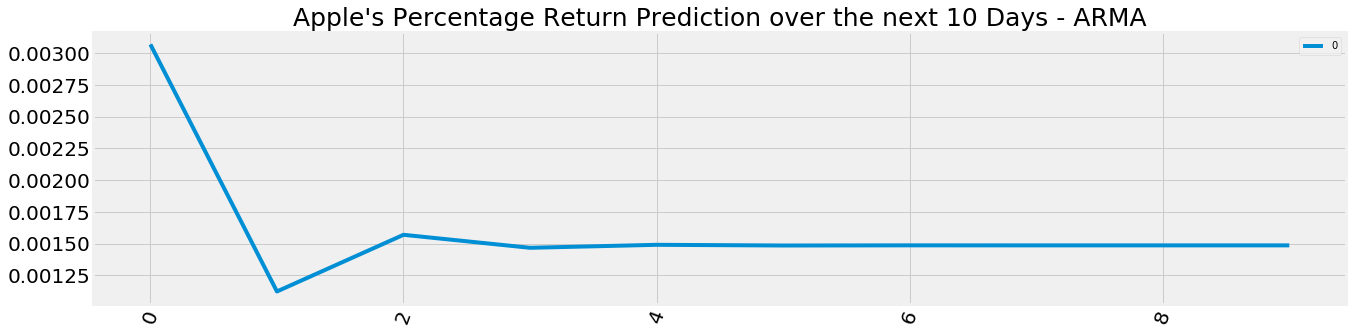

In [36]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Percentage Return Prediction over the next 10 Days - ARMA", fontsize=25);

In [37]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results_close.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Closing Price Prediction over the next 10 Days - ARMA", fontsize=25);

NameError: name 'results_close' is not defined

In [38]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1268
Model:                     ARMA(1, 1)   Log Likelihood                3234.431
Method:                       css-mle   S.D. of innovations              0.019
Date:                Mon, 18 Jan 2021   AIC                          -6460.863
Time:                        00:28:22   BIC                          -6440.282
Sample:                             0   HQIC                         -6453.131
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.000      3.107      0.002       0.001       0.002
ar.L1.y       -0.2293      0.229     -0.999      0.318      -0.679       0.220
ma.L1.y        0.1095      0.235      0.467      0.640      -0.350       0.569
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.3607           +0.0000j            4.3607            0.5000
MA.1           -9.1296           +0.0000j            9.1296            0.5000
-----------------------------------------------------------------------------
"""

In [39]:
results_close.summary()

NameError: name 'results_close' is not defined

## ARIMA Model for Apple Inc

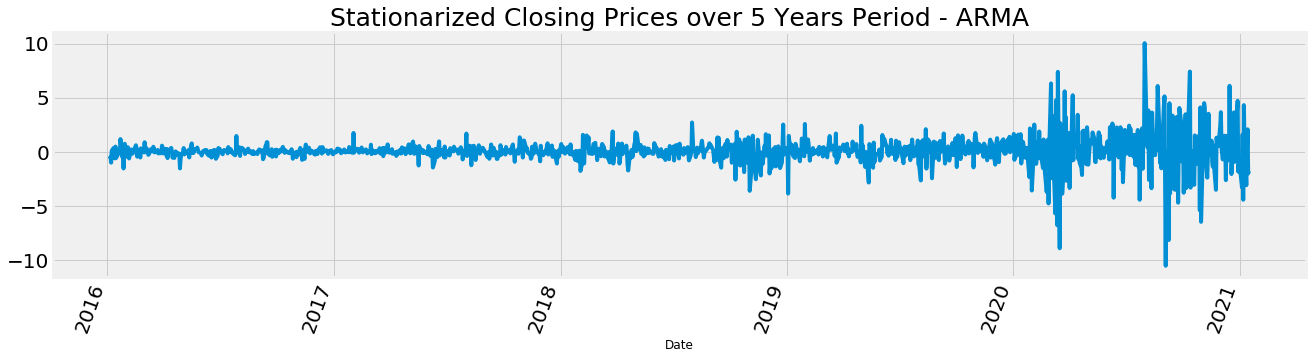

In [40]:
# Differencing the Close price stationarizes the time series
AAPL_close_df.diff().plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Stationarized Closing Prices over 5 Years Period - ARMA", fontsize=25);

## Autocorrelation and Partial Autocorrelation Analysis

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

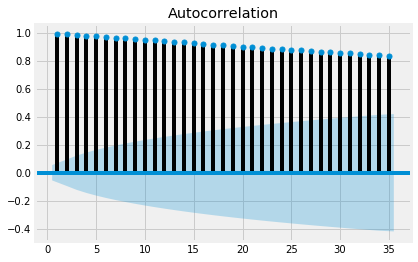

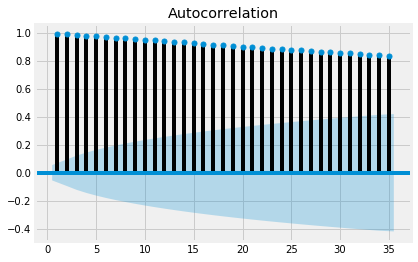

In [42]:
# Plot the autocorrelation of the Close Prices
plot_acf(AAPL_close_df, zero=False, lags=35)

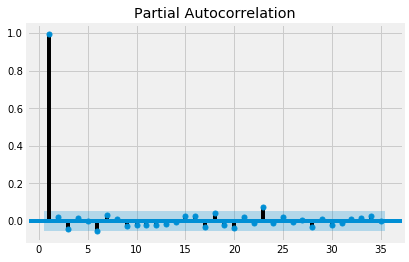

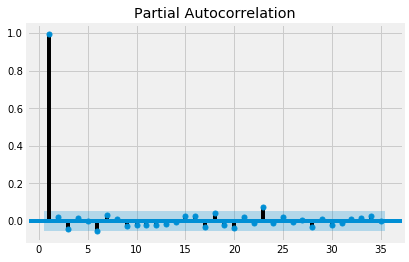

In [43]:
# Plot the partial autocorrelation of the returns
plot_pacf(AAPL_close_df, zero=False, lags=35)

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
# Create an ARIMA model
model = ARIMA(AAPL_close_df.values, order=(1, 1, 1))
# Fit the model to the data
results_ARIMA = model.fit()
# Print the model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1268
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2126.920
Method:                       css-mle   S.D. of innovations              1.295
Date:                Mon, 18 Jan 2021   AIC                           4261.839
Time:                        00:28:29   BIC                           4282.420
Sample:                             1   HQIC                          4269.571
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0812      0.032      2.510      0.012       0.018       0.145
ar.L1.D.y     -0.2904      0.161     -1.801      0.072      -0.606       0.026
ma.L1.D.y      0.1479      0.166      0.890      0.374      -0.178       0.474
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.4440           +0.0000j            3.4440            0.5000
MA.1           -6.7624           +0.0000j            6.7624            0.5000
-----------------------------------------------------------------------------
"""

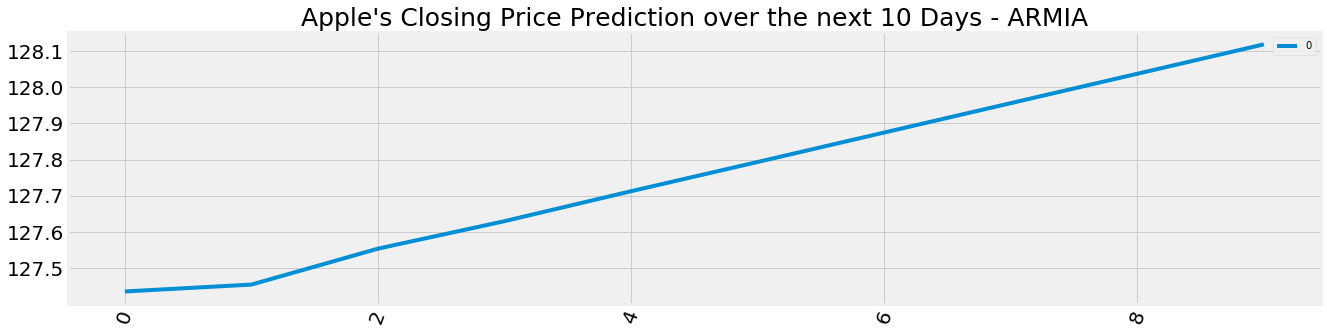

In [46]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Closing Price Prediction over the next 10 Days - ARMIA", fontsize=25);

## ARIMA Model for BitCoin

In [47]:
# Create an ARIMA model for BitCoin
model_BTC = ARIMA(BTC_df["BTC_Close"].values, order=(1, 1, 1))
# Fit the model to the data
results_ARIMA_BTC = model_BTC.fit()
# Print the model summary
results_ARIMA_BTC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  719
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5455.554
Method:                       css-mle   S.D. of innovations            477.585
Date:                Mon, 18 Jan 2021   AIC                          10919.109
Time:                        00:28:32   BIC                          10937.420
Sample:                             1   HQIC                         10926.178
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6118     19.832      2.199      0.028       4.742      82.481
ar.L1.D.y     -0.2429      0.197     -1.231      0.218      -0.630       0.144
ma.L1.D.y      0.3841      0.187      2.056      0.040       0.018       0.750
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.1169           +0.0000j            4.1169            0.5000
MA.1           -2.6037           +0.0000j            2.6037            0.5000
-----------------------------------------------------------------------------
"""

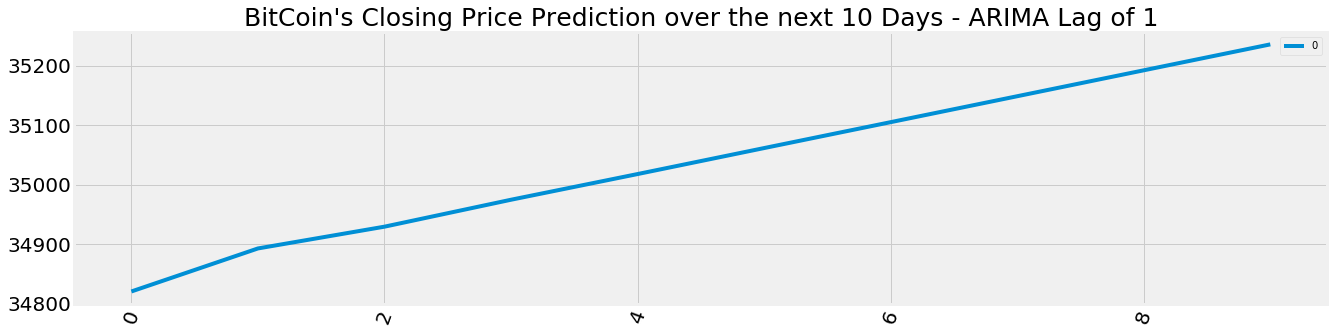

In [48]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA_BTC.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Price Prediction over the next 10 Days - ARIMA Lag of 1", fontsize=25);

## ARIMA Model using a Lag of 2 for BitCoin

In [49]:
# Create an ARIMA Model and fit it to the data
model_2 = ARIMA(BTC_df["BTC_Close"].values, order=(2, 1, 1))
results_ARIMA_2 = model_2.fit()
# print the model summary
results_ARIMA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  719
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5454.874
Method:                       css-mle   S.D. of innovations            477.132
Date:                Mon, 18 Jan 2021   AIC                          10919.749
Time:                        00:28:34   BIC                          10942.638
Sample:                             1   HQIC                         10928.586
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.7358     18.739      2.334      0.020       7.008      80.464
ar.L1.D.y      0.2195      0.371      0.591      0.554      -0.508       0.947
ar.L2.D.y     -0.0908      0.058     -1.562      0.118      -0.205       0.023
ma.L1.D.y     -0.0825      0.372     -0.222      0.825      -0.812       0.647
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2090           -3.0911j            3.3191           -0.1907
AR.2            1.2090           +3.0911j            3.3191            0.1907
MA.1           12.1159           +0.0000j           12.1159            0.0000
-----------------------------------------------------------------------------
"""

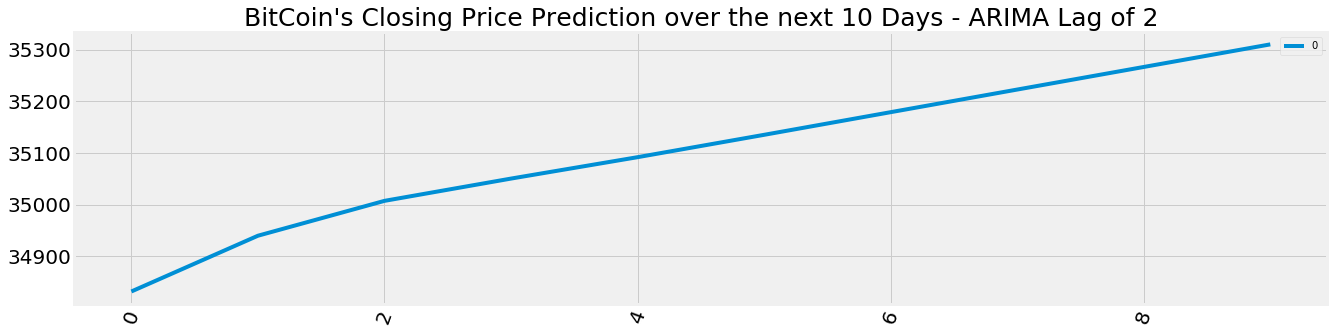

In [50]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA_2.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Price Prediction over the next 10 Days - ARIMA Lag of 2", fontsize=25);

## Linear Regression with Train/Test split

In [51]:
import arch as arch
import warnings
warnings.filterwarnings('ignore')

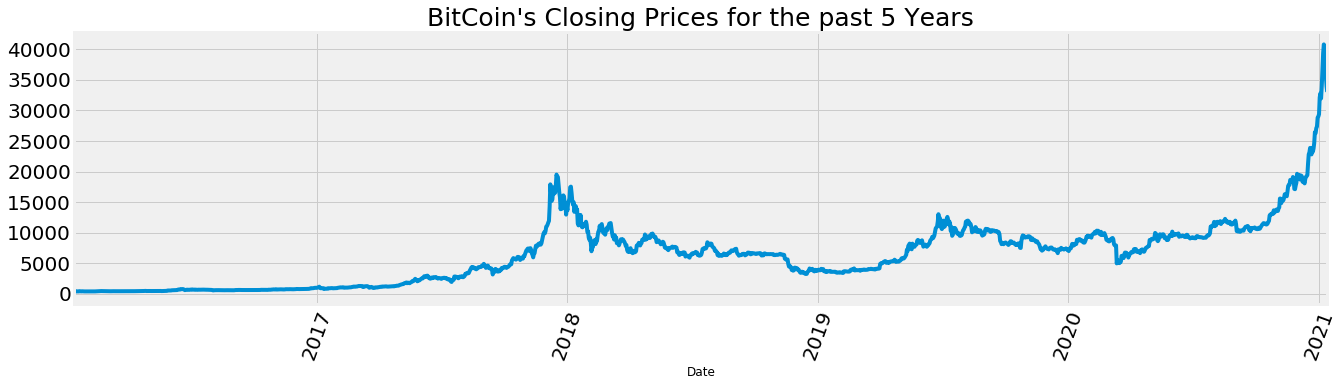

In [52]:
BTC_path = Path('../Resources/BTC.csv')
BTC_csv = pd.read_csv(BTC_path, parse_dates=True, index_col='Date')
BTC_csv.Close.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Prices for the past 5 Years", fontsize=25);

In [53]:
# Create a series using "Close" price percentage returns, drop any NaNs, and check the results:
# (Make sure to multiply the pct_change() results by *100)
BTC_csv['Return'] = BTC_csv.Close.pct_change() * 100
BTC_csv['Lagged_Return'] = BTC_csv['Return'].shift()
BTC_csv = BTC_csv.dropna()
BTC_csv.tail()

Open          High           Low         Close  \
Date                                                                 
2021-01-09  40788.640625  41436.351563  38980.875000  40254.546875   
2021-01-10  40254.218750  41420.191406  35984.628906  38356.441406   
2021-01-11  38346.531250  38346.531250  30549.599609  35566.656250   
2021-01-12  35516.359375  36568.527344  32697.976563  33922.960938   
2021-01-13  33963.351563  34061.976563  32643.052734  33017.734375   

               Adj Close        Volume    Return  Lagged_Return  
Date                                                             
2021-01-09  40254.546875   61984162837 -1.331114       3.623390  
2021-01-10  38356.441406   79980747690 -4.715257      -1.331114  
2021-01-11  35566.656250  123320567398 -7.273316      -4.715257  
2021-01-12  33922.960938   74773277909 -4.621450      -7.273316  
2021-01-13  33017.734375   75174313984 -2.668477      -4.621450

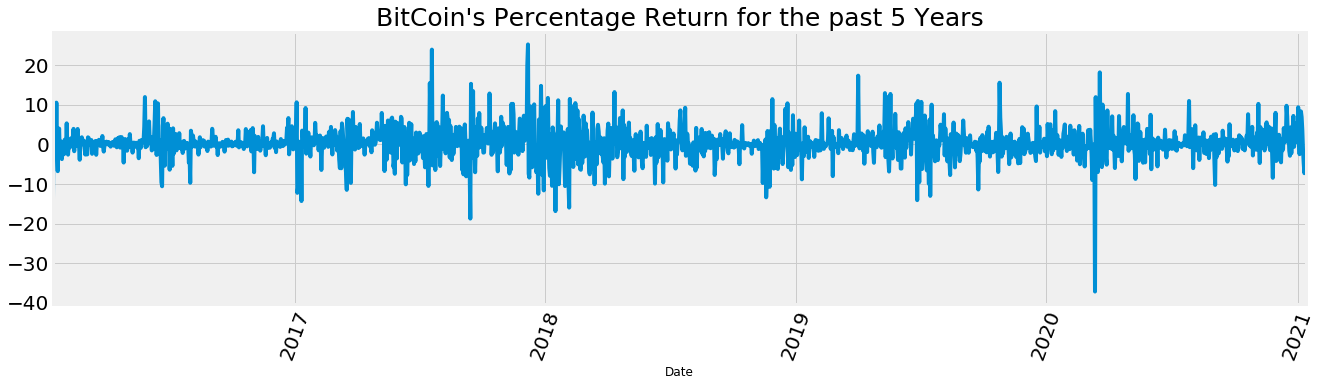

In [54]:
BTC_csv['Return'].plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Percentage Return for the past 5 Years", fontsize=25);

In [55]:
# Create a train/test split for the data using 2017-2018 for training and 2019 for testing
train = BTC_csv['2017':'2019']
test = BTC_csv['2020']
# Create four DataFrames:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

## Make predictions using the Testing Data

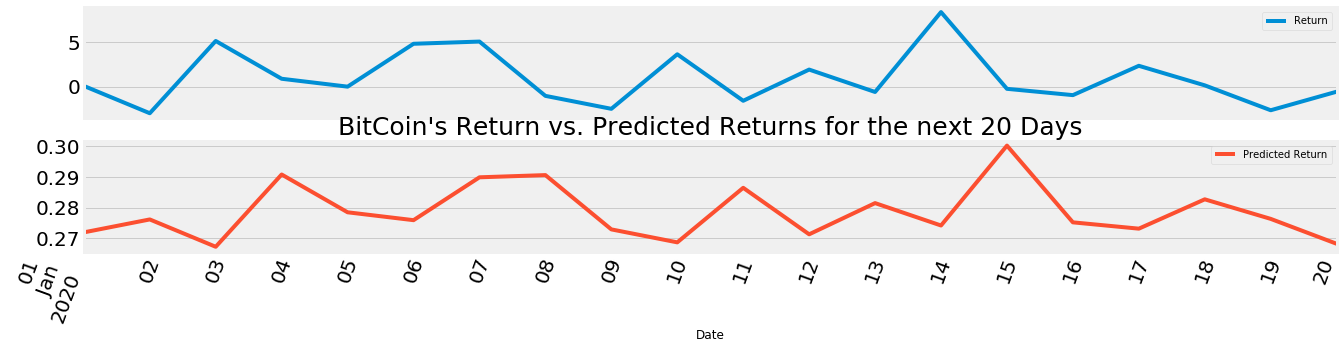

In [56]:
# Make a prediction of "y" values using just the test dataset
BTC_predictions = model_LR.predict(X_test)
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame:
Predictions_Results = y_test.to_frame()
Predictions_Results["Predicted Return"] = BTC_predictions

# Plot the first 20 predictions vs the true values
Predictions_Results[:20].plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    subplots=True,
    grid=True);
plt.title(label="BitCoin's Return vs. Predicted Returns for the next 20 Days", fontsize=25);

## Out-of-Sample Performance


In [57]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the DataFrame above)
mse = mean_squared_error(
    Predictions_Results["Return"],
    Predictions_Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 3.771512992249688


## In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [58]:
# Construct a DataFrame using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model_LR.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 4.324559463850791


## ARMA Model for BitCoin Prediction

In [59]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model_5 = ARMA(BTC_csv['Return'].values, order=(1,1))
# Fit the model to the data
results_5 = model_5.fit()

# Look at Summary
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     ARMA(1, 1)   Log Likelihood               -5091.650
Method:                       css-mle   S.D. of innovations              3.933
Date:                Mon, 18 Jan 2021   AIC                          10191.300
Time:                        00:28:48   BIC                          10213.340
Sample:                             0   HQIC                         10199.430
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3164      0.091      3.471      0.001       0.138       0.495
ar.L1.y       -0.8863      0.085    -10.466      0.000      -1.052      -0.720
ma.L1.y        0.8681      0.090      9.620      0.000       0.691       1.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1283           +0.0000j            1.1283            0.5000
MA.1           -1.1519           +0.0000j            1.1519            0.5000
-----------------------------------------------------------------------------
"""

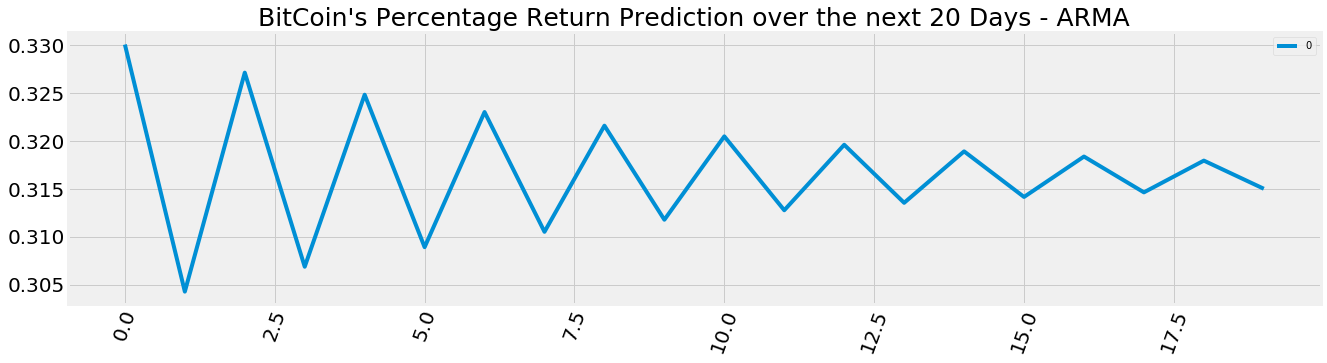

In [60]:
# Plot the forecasted return for the next 20 days
pd.DataFrame(results_5.forecast(steps=20)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Percentage Return Prediction over the next 20 Days - ARMA", fontsize=25);

In [12]:
import pandas as pd
df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
                   'monkey', 'parrot', 'shark', 'whale', 'zebra']})

df.tail(1).iloc[0].values[0]


'zebra'

In [14]:
import plotly.express as px

long_df = px.data.medals_long()
long_df

nation   medal  count
0  South Korea    gold     24
1        China    gold     10
2       Canada    gold      9
3  South Korea  silver     13
4        China  silver     15
5       Canada  silver     12
6  South Korea  bronze     11
7        China  bronze      8
8       Canada  bronze     12